In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

file_path = r"C:\Users\chaya\OneDrive\Documents\PredictionData.xlsx"

sheet_name = 'vw_ChurnData'

df = pd.read_excel(file_path, sheet_name=sheet_name)

print(df.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

# Data Preprocessing

In [12]:
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(data[column])

df['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


# Training Random Forest Model

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=50)

# Evaluating our Model

Confusion Matrix:
[[796  58]
 [139 209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       854
           1       0.78      0.60      0.68       348

    accuracy                           0.84      1202
   macro avg       0.82      0.77      0.78      1202
weighted avg       0.83      0.84      0.83      1202



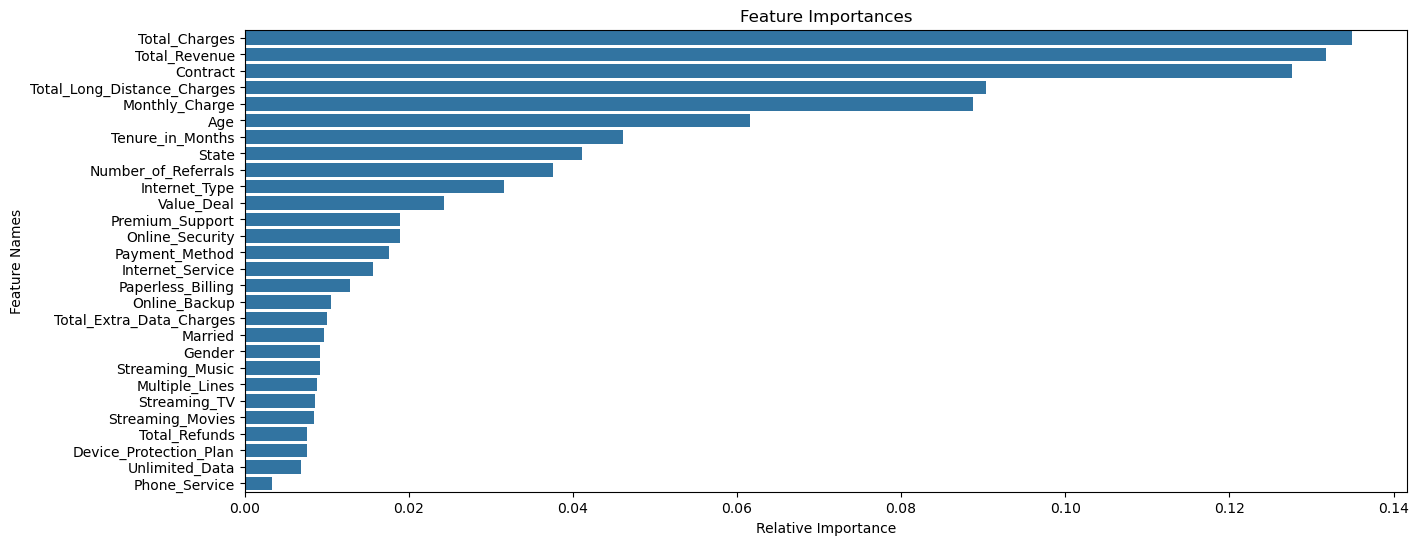

In [26]:
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [28]:

file_path = r"C:\Users\chaya\OneDrive\Documents\PredictionData.xlsx"

sheet_name = 'vw_JoinData'

df2 = pd.read_excel(file_path, sheet_name=sheet_name)

print(df2.head())


original_data = df2.copy()


customer_ids = df2['Customer_ID']

df2 = df2.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

for column in df2.select_dtypes(include=['object']).columns:
    df2[column] = label_encoders[column].transform(df2[column])

new_predictions = rf_model.predict(df2)

original_data['Customer_Status_Predicted'] = new_predictions

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

original_data.to_csv(r"C:\Users\chaya\OneDrive\Documents\Predictions.csv", index=False)



  Customer_ID  Gender  Age Married       State  Number_of_Referrals  \
0   14567-TAM    Male   43      No  Tamil Nadu                    1   
1   17796-BIH  Female   65      No       Bihar                    5   
2   18015-ODI  Female   28     Yes      Odisha                   15   
3   19539-PUN  Female   37     Yes      Punjab                   14   
4   19541-ODI  Female   37     Yes      Odisha                   15   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 9        NaN           Yes             No  ...   
1                 1        NaN           Yes             No  ...   
2                 9        NaN           Yes             No  ...   
3                 8     Deal 5           Yes             No  ...   
4                14     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      20.350000     20.350000           0.0   
1  Bank Withdrawal      48.450001 